In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Fonction pour charger les fichiers JSON avec détection des problèmes de format
def load_json_files(directory_path):
    dataframes = {}
    for filename in os.listdir(directory_path):
        if filename.endswith(".json"):
            file_path = os.path.join(directory_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                try:
                    # Tenter de charger en tant que fichier JSON complet
                    data = json.load(file)
                    dataframes[filename] = pd.json_normalize(data)
                    print(f"Chargé : {filename} (fichier JSON complet)")
                except json.JSONDecodeError:
                    print(f"Chargement ligne par ligne pour {filename}...")
                    # Charger ligne par ligne si le fichier contient plusieurs objets JSON
                    with open(file_path, 'r', encoding='utf-8') as line_file:
                        data = []
                        for line in line_file:
                            try:
                                data.append(json.loads(line.strip()))
                            except json.JSONDecodeError as e:
                                print(f"Ligne ignorée dans {filename} : {e}")
                        if data:
                            dataframes[filename] = pd.json_normalize(data)
                            print(f"Chargé : {filename} (ligne par ligne)")
    return dataframes

In [4]:
# chemin des dossier
nodes_directory = "/content/drive/MyDrive/IAFA_23-24/24/FouilleGraphe/Projet/database/Nodes"
relations_directory = "/content/drive/MyDrive/IAFA_23-24/24/FouilleGraphe/Projet/database/Relationships"

In [5]:
# chargement des fichiers des noeuds
nodes_data = load_json_files(nodes_directory)


Chargement ligne par ligne pour User.json...
Chargé : User.json (ligne par ligne)
Chargement ligne par ligne pour PostCategory.json...
Chargé : PostCategory.json (ligne par ligne)
Chargement ligne par ligne pour Event.json...
Chargé : Event.json (ligne par ligne)
Chargement ligne par ligne pour Hashtag.json...
Chargé : Hashtag.json (ligne par ligne)
Chargement ligne par ligne pour Tweet.json...
Chargé : Tweet.json (ligne par ligne)


In [6]:
# Chargement des relations
relations_data = load_json_files(relations_directory)

Chargement ligne par ligne pour IS_ABOUT.json...
Chargé : IS_ABOUT.json (ligne par ligne)
Chargement ligne par ligne pour TALKS_ABOUT.json...
Chargé : TALKS_ABOUT.json (ligne par ligne)
Chargement ligne par ligne pour REPLY_TO.json...
Chargé : REPLY_TO.json (ligne par ligne)
Chargement ligne par ligne pour RETWEETED.json...
Chargé : RETWEETED.json (ligne par ligne)
Chargement ligne par ligne pour MENTIONS.json...
Chargé : MENTIONS.json (ligne par ligne)
Chargement ligne par ligne pour HAS_CATEGORY.json...
Chargé : HAS_CATEGORY.json (ligne par ligne)
Chargement ligne par ligne pour HAS_HASHTAG.json...
Chargé : HAS_HASHTAG.json (ligne par ligne)
Chargement ligne par ligne pour RETWEETS.json...
Chargé : RETWEETS.json (ligne par ligne)
Chargement ligne par ligne pour POSTED.json...
Chargé : POSTED.json (ligne par ligne)
Chargement ligne par ligne pour REPLIED_TO.json...
Chargé : REPLIED_TO.json (ligne par ligne)


In [7]:
print(nodes_data.keys())

dict_keys(['User.json', 'PostCategory.json', 'Event.json', 'Hashtag.json', 'Tweet.json'])


In [8]:
print(relations_data.keys())

dict_keys(['IS_ABOUT.json', 'TALKS_ABOUT.json', 'REPLY_TO.json', 'RETWEETED.json', 'MENTIONS.json', 'HAS_CATEGORY.json', 'HAS_HASHTAG.json', 'RETWEETS.json', 'POSTED.json', 'REPLIED_TO.json'])


In [9]:
# Afficher la taille de tous les DataFrames des nœuds
for key, df in nodes_data.items():
    print(f"Noeud : {key}")
    print(df.shape)

Noeud : User.json
(43141, 13)
Noeud : PostCategory.json
(25, 4)
Noeud : Event.json
(34, 6)
Noeud : Hashtag.json
(10441, 5)
Noeud : Tweet.json
(55986, 16)


In [10]:
# Afficher la taille de tous les DataFrames des relations
for key, df in relations_data.items():
    print(f"Relations : {key}")
    print(df.shape)

Relations : IS_ABOUT.json
(36668, 7)
Relations : TALKS_ABOUT.json
(31134, 7)
Relations : REPLY_TO.json
(2479, 7)
Relations : RETWEETED.json
(4377, 7)
Relations : MENTIONS.json
(20894, 8)
Relations : HAS_CATEGORY.json
(96566, 7)
Relations : HAS_HASHTAG.json
(55414, 7)
Relations : RETWEETS.json
(6296, 8)
Relations : POSTED.json
(55986, 7)
Relations : REPLIED_TO.json
(1840, 8)


In [11]:
# Afficher les premières lignes de tous les DataFrames des noeuds
for key, df in nodes_data.items():
    print(f"noeuds : {key}")
    print(df.head())

noeuds : User.json
  n.type   n.id n.labels  n.properties.friends_count  \
0   node  56568   [User]                         400   
1   node  56569   [User]                        4930   
2   node  56570   [User]                        4726   
3   node  56571   [User]                      104963   
4   node  56572   [User]                        1849   

   n.properties.tweets_count  n.properties.isVerified  \
0                          1                    False   
1                          2                    False   
2                          1                    False   
3                          2                    False   
4                          1                    False   

  n.properties.screen_name  n.properties.listed_count  \
0               jeffseroka                          3   
1                  mpf2011                        309   
2          SF_AngelaThorpe                         70   
3          WilliamScherer3                       1101   
4               

In [12]:
# Afficher les premières lignes de tous les DataFrames des relations
for key, df in relations_data.items():
    print(f"Relations : {key}")
    print(df.head())

Relations : IS_ABOUT.json
  r.id        r.type   r.label r.start.id r.start.labels r.end.id r.end.labels
0    0  relationship  IS_ABOUT        588        [Tweet]        0      [Event]
1    1  relationship  IS_ABOUT        589        [Tweet]        0      [Event]
2    2  relationship  IS_ABOUT       3060        [Tweet]        4      [Event]
3    3  relationship  IS_ABOUT        582        [Tweet]        0      [Event]
4    4  relationship  IS_ABOUT        583        [Tweet]        0      [Event]
Relations : TALKS_ABOUT.json
     r.id        r.type      r.label r.start.id r.start.labels r.end.id  \
0  206673  relationship  TALKS_ABOUT      78347         [User]       20   
1  206674  relationship  TALKS_ABOUT      78347         [User]       26   
2  206675  relationship  TALKS_ABOUT      81657         [User]       25   
3  206676  relationship  TALKS_ABOUT      60808         [User]        8   
4  206677  relationship  TALKS_ABOUT      61156         [User]        9   

  r.end.labels  
0  

In [13]:
users = nodes_data['User.json'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43141 entries, 0 to 43140
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   n.type                         43141 non-null  object
 1   n.id                           43141 non-null  object
 2   n.labels                       43141 non-null  object
 3   n.properties.friends_count     43141 non-null  int64 
 4   n.properties.tweets_count      43141 non-null  int64 
 5   n.properties.isVerified        43141 non-null  bool  
 6   n.properties.screen_name       43141 non-null  object
 7   n.properties.listed_count      43141 non-null  int64 
 8   n.properties.statuses_count    43141 non-null  int64 
 9   n.properties.favourites_count  43141 non-null  int64 
 10  n.properties.followers_count   43141 non-null  int64 
 11  n.properties.name              43141 non-null  object
 12  n.properties.id                43141 non-null  int64 
dtypes

In [14]:
# Trouver les utilisateurs ayant un grand nombre de followers
users = nodes_data['User.json']
# Identifier les influenceurs (top 1%)
threshold = users['n.properties.followers_count'].quantile(0.99)
influencers = users[users['n.properties.followers_count'] >= threshold]
print(f"Seuil des influenceurs (99eme percentile) : {threshold}")
print(f"Nombre d'influenceurs : {len(influencers)}")
print(influencers[['n.properties.id', 'n.properties.followers_count']])


Seuil des influenceurs (99eme percentile) : 1206131.399999997
Nombre d'influenceurs : 432
       n.properties.id  n.properties.followers_count
59           454313925                       2552239
419             972651                       9375849
1124           1367531                      16159871
1730         170965705                       1432171
1749         202890266                       5619485
...                ...                           ...
42931          5577902                       2116204
42949         16389180                       3813438
42950         71297990                       1671906
42966         64038747                       6989214
42988         40076725                       5156169

[432 rows x 2 columns]


In [15]:
# Identifier les tweets ayant un nombre de retweets exceptionnel
tweets = nodes_data['Tweet.json']
threshold_retweets = tweets['n.properties.retweet_count'].quantile(0.99)
viral_tweets = tweets[tweets['n.properties.retweet_count'] >= threshold_retweets]
print(f"Seuil des tweets viraux (99eme percentile) : {threshold_retweets}")
print(viral_tweets[['n.properties.id', 'n.properties.text', 'n.properties.retweet_count']])


Seuil des tweets viraux (99eme percentile) : 1759.0
          n.properties.id                                  n.properties.text  \
2807   396377234346631168  RT @AlfredoFlores: My prayers are with the fam...   
2808   396377850934460416  RT @AlfredoFlores: My prayers are with the fam...   
2811   396378035458703360  RT @AlfredoFlores: My prayers are with the fam...   
2814   396378798842580992  RT @AlfredoFlores: My prayers are with the fam...   
2820   396381814539182080  RT @AlfredoFlores: My prayers are with the fam...   
...                   ...                                                ...   
55678  750367560349020162  Abdullah Muflahi, owner of store where Alton S...   
55681  750523181211852801  Dear Police,\n\nUse your common sense, you got...   
55687  750916967175901184  his 4 year old daughter had to watch him shot ...   
55693  750931210176573441  Wearing a hoodie. Failing to use turn signal. ...   
55695  751135340606488576  Two police shootings, two videos, two bla

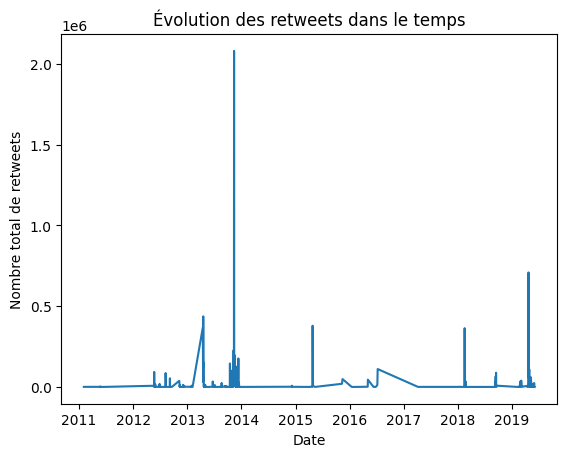

In [16]:
# Observation de la maniere dont les retweets évoluent au fil du temps
tweets['n.properties.created_at'] = pd.to_datetime(tweets['n.properties.created_at'])
retweets_by_time = tweets.groupby(tweets['n.properties.created_at'].dt.date)['n.properties.retweet_count'].sum()
retweets_by_time.plot(title='Évolution des retweets dans le temps')
plt.xlabel('Date')
plt.ylabel('Nombre total de retweets')
plt.show()


In [17]:
# Analyse des hashtags Hashtag.json
# Identifier les hashtags les plus populaires.

hashtags = nodes_data['Hashtag.json']
print(hashtags.nlargest(10, 'n.properties.occurences')[['n.properties.id', 'n.properties.occurences']])


   n.properties.id  n.properties.occurences
0          ymmfire                     2540
1           RubyPH                     2291
2  NepalEarthquake                     1434
3              ymm                     1264
4            Nepal                     1127
5          Hagupit                      875
6       earthquake                      776
7   CycloneKenneth                      729
8      Philippines                      691
9       Mozambique                      601


In [18]:
# Analyse des catégories de tweets PostCategory.json
# Verifier la repartition des categories

categories = nodes_data['PostCategory.json']
print(categories['n.properties.id'].value_counts())


n.properties.id
Location                 1
News                     1
ContextualInformation    1
Factoid                  1
Official                 1
Sentiment                1
CleanUp                  1
Volunteer                1
Advice                   1
FirstPartyObservation    1
Weather                  1
Discussion               1
Donations                1
MovePeople               1
MultimediaShare          1
OriginalEvent            1
NewSubEvent              1
Hashtags                 1
ServiceAvailable         1
ThirdPartyObservation    1
Irrelevant               1
SearchAndRescue          1
InformationWanted        1
GoodsServices            1
EmergingThreats          1
Name: count, dtype: int64


In [19]:
# Analyse des relations
# Pour Comprendre la structure et les types de relations dans le graphe.


In [20]:
# Relations entre utilisateurs et tweets POSTED.json
# Identifier les utilisateurs les plus actifs (nombre de tweets postés).

posted = relations_data['POSTED.json']
most_active_users = posted['r.start.id'].value_counts().head(10)
print(most_active_users)


r.start.id
58501    95
67357    80
58597    75
85174    67
85160    63
85146    62
88246    62
86637    57
58338    57
85177    53
Name: count, dtype: int64


In [21]:
relations_data['MENTIONS.json'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20894 entries, 0 to 20893
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   r.id                20894 non-null  object 
 1   r.type              20894 non-null  object 
 2   r.label             20894 non-null  object 
 3   r.start.id          20894 non-null  object 
 4   r.start.labels      20894 non-null  object 
 5   r.end.id            20894 non-null  object 
 6   r.end.labels        20894 non-null  object 
 7   r.properties.times  9725 non-null   float64
dtypes: float64(1), object(7)
memory usage: 1.3+ MB


In [22]:
# Mentions dans les tweets MENTIONS.json
# Nombre de mentions par tweet.
# Les utilisateurs les plus mentionnés.

mentions = relations_data['MENTIONS.json']
print(mentions['r.end.id'].value_counts().head(10))  # Utilisateurs les plus mentionnés


r.end.id
83848    241
64463    240
88246    222
58501    179
96724    161
64465    157
79100    153
96126    152
58317    149
61678    139
Name: count, dtype: int64


In [23]:
# Retweets RETWEETED.json
# Distribution des retweets entre tweets.
retweeted = relations_data['RETWEETED.json']
print(retweeted['r.start.id'].value_counts().head(10))  # Tweets les plus retweetés


r.start.id
583      1
24253    1
24321    1
24292    1
24278    1
24277    1
24271    1
24262    1
24246    1
23862    1
Name: count, dtype: int64


In [24]:
# Relations utilisateur-utilisateur RETWEETS.json et REPLIED_TO.json

# Relations sociales basées sur les retweets et les réponses.

retweets_user = relations_data['RETWEETS.json']
replied_to = relations_data['REPLIED_TO.json']

print(retweets_user['r.start.id'].value_counts().head(5))  # Utilisateurs les plus retweetés
print(replied_to['r.start.id'].value_counts().head(5))    # Utilisateurs les plus répondus


r.start.id
86290    16
85888     5
57395     5
60078     4
56722     4
Name: count, dtype: int64
r.start.id
66656    5
85133    4
93768    4
60729    4
85200    3
Name: count, dtype: int64


In [26]:
import networkx as nx

# Créer un graphe dirigé
G = nx.DiGraph()

# Ajouter des nœuds : Utilisateurs
for _, row in nodes_data['User.json'].iterrows():
    G.add_node(row['n.properties.id'],
               type='User',
               followers=row['n.properties.followers_count'])

# Ajouter des nœuds : Tweets
for _, row in nodes_data['Tweet.json'].iterrows():
    G.add_node(row['n.properties.id'],
               type='Tweet',
               retweets=row['n.properties.retweet_count'])

# Ajouter des nœuds : Hashtags
for _, row in nodes_data['Hashtag.json'].iterrows():
    G.add_node(row['n.properties.id'],
               type='Hashtag',
               occurrences=row['n.properties.occurences'])

# Ajouter des nœuds : PostCategories
for _, row in nodes_data['PostCategory.json'].iterrows():
    G.add_node(row['n.properties.id'],
               type='PostCategory')

# Ajouter des nœuds : Events
for _, row in nodes_data['Event.json'].iterrows():
    G.add_node(row['n.properties.id'],
               type='Event')

# Ajouter toutes les relations disponibles
relations = {
    'POSTED': 'POSTED.json',
    'MENTIONS': 'MENTIONS.json',
    'RETWEETED': 'RETWEETED.json',
    'HAS_HASHTAG': 'HAS_HASHTAG.json',
    'IS_ABOUT': 'IS_ABOUT.json',
    'HAS_CATEGORY': 'HAS_CATEGORY.json',
    'TALKS_ABOUT': 'TALKS_ABOUT.json',
    'RETWEETS': 'RETWEETS.json',
    'REPLY_TO': 'REPLY_TO.json',
    'REPLIED_TO': 'REPLIED_TO.json',
}

for relation_type, file_name in relations.items():
    for _, row in relations_data[file_name].iterrows():
        G.add_edge(row['r.start.id'], row['r.end.id'], relation=relation_type)

# Afficher un résumé du graphe
print(f"Graphe créé avec {G.number_of_nodes()} nœuds et {G.number_of_edges()} relations.")


Graphe créé avec 219247 nœuds et 304612 relations.


In [27]:
print(f"Nombre de relations dans le graphe : {G.number_of_edges()}")
print("Exemples de relations (arêtes) :")
print(list(G.edges(data=True))[:10])  # Affiche les 10 premières relations


Nombre de relations dans le graphe : 304612
Exemples de relations (arêtes) :
[('56568', '582', {'relation': 'POSTED'}), ('56568', '0', {'relation': 'TALKS_ABOUT'}), ('582', '100609', {'relation': 'HAS_HASHTAG'}), ('582', '99813', {'relation': 'HAS_HASHTAG'}), ('582', '0', {'relation': 'IS_ABOUT'}), ('582', '562', {'relation': 'HAS_CATEGORY'}), ('56569', '775', {'relation': 'POSTED'}), ('56569', '583', {'relation': 'POSTED'}), ('56569', '97153', {'relation': 'RETWEETS'}), ('56569', '0', {'relation': 'TALKS_ABOUT'})]


In [119]:
# Visualisation d'un sous-graphe pour exemple
'''
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=False, node_size=10, alpha=0.7, edge_color='gray')
plt.title("Visualisation du graphe global")
plt.savefig("graphe_global.png")
plt.show()
'''
# prends enormement de temps

'\nplt.figure(figsize=(10, 10))\npos = nx.spring_layout(G, k=0.5)\nnx.draw(G, pos, with_labels=False, node_size=10, alpha=0.7, edge_color=\'gray\')\nplt.title("Visualisation du graphe global")\nplt.savefig("graphe_global.png") \nplt.show()\n'

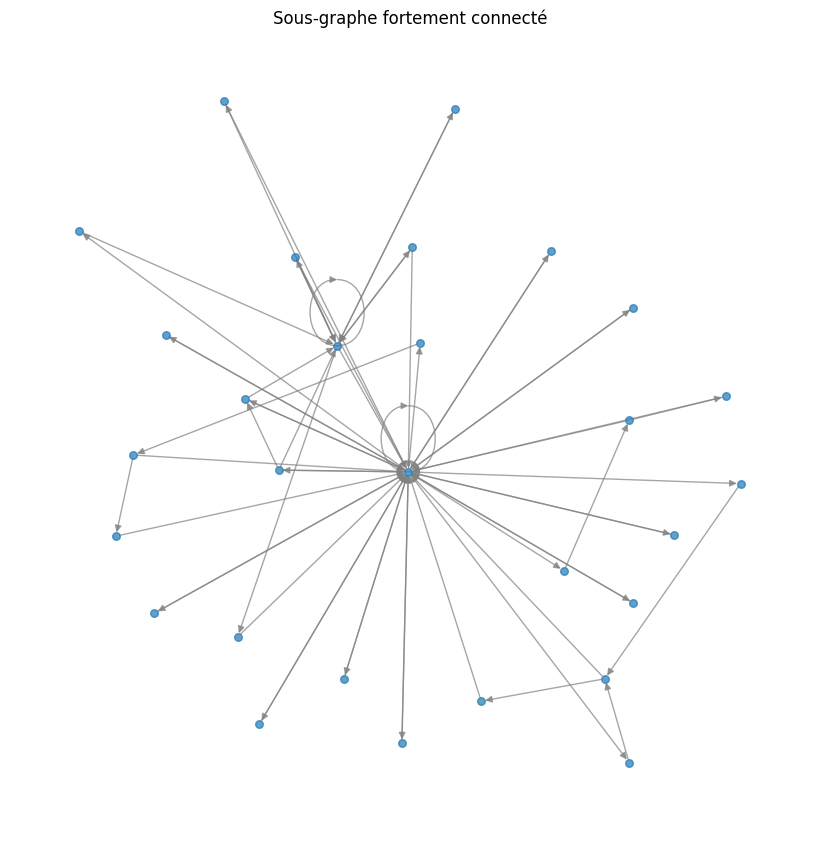

In [28]:
# Trouver les composantes fortement connectées
largest_cc = max(nx.strongly_connected_components(G), key=len)
connected_subgraph = G.subgraph(largest_cc)

# Visualiser le sous-graphe connecté
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(connected_subgraph, k=0.5)
nx.draw(connected_subgraph, pos, with_labels=False, node_size=30, edge_color='gray', alpha=0.7)
plt.title("Sous-graphe fortement connecté")
plt.show()


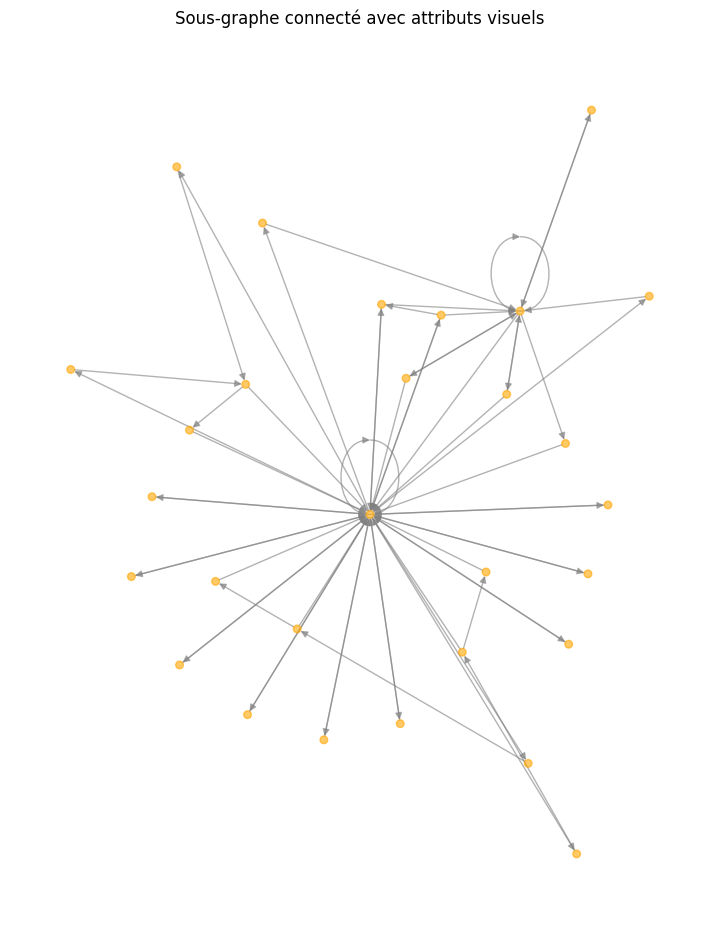

In [29]:
# Ajouter des tailles et couleurs aux nœuds
node_sizes = []
node_colors = []
for node in connected_subgraph:
    if connected_subgraph.nodes[node].get('type') == 'User':
        node_sizes.append(connected_subgraph.nodes[node].get('followers', 10) / 100)
        node_colors.append('blue')
    elif connected_subgraph.nodes[node].get('type') == 'Tweet':
        node_sizes.append(connected_subgraph.nodes[node].get('retweets', 10) / 10)
        node_colors.append('green')
    else:
        node_sizes.append(30)
        node_colors.append('orange')

# Dessiner le graphe avec couleurs et tailles
plt.figure(figsize=(7, 9))
pos = nx.spring_layout(connected_subgraph, k=0.5)
nx.draw(connected_subgraph,
        pos,
        with_labels=False,
        node_size=node_sizes,
        node_color=node_colors,
        edge_color='gray',
        alpha=0.6)
plt.title("Sous-graphe connecté avec attributs visuels")
plt.show()


In [30]:
# Identifier les nœuds influents
# Calcul de la centralité de degré
degree_centrality = nx.degree_centrality(connected_subgraph)
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top noeuds par centralité de degré :", top_nodes)


Top noeuds par centralité de degré : [('58597', 1.4285714285714284), ('90554', 0.5), ('41361', 0.14285714285714285), ('41449', 0.14285714285714285), ('97924', 0.14285714285714285), ('90585', 0.10714285714285714), ('42136', 0.10714285714285714), ('66181', 0.10714285714285714), ('42461', 0.10714285714285714), ('42515', 0.07142857142857142)]


In [31]:
# Étudier les relations dominantes
# Distribution des relations Pour voir quelles relations ont les plus fréquentes
from collections import Counter

edge_types = [d['relation'] for _, _, d in connected_subgraph.edges(data=True)]
relation_counts = Counter(edge_types)
print("Distribution des types de relations :", relation_counts)


Distribution des types de relations : Counter({'POSTED': 24, 'MENTIONS': 18, 'REPLY_TO': 15, 'REPLIED_TO': 2})


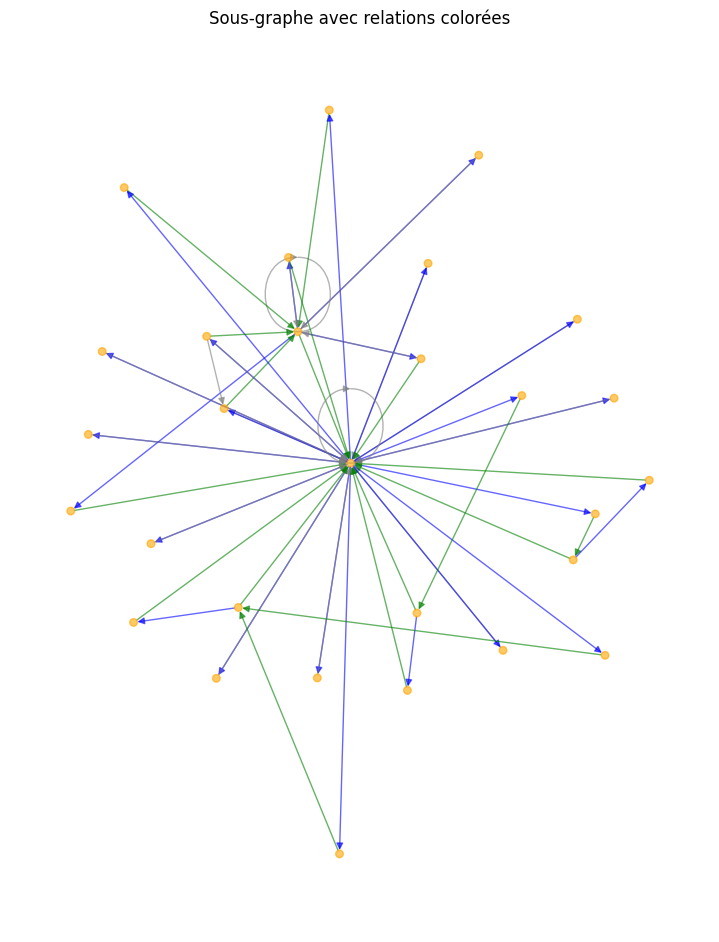

In [32]:
edge_colors = []
for _, _, data in connected_subgraph.edges(data=True):
    if data['relation'] == 'POSTED':
        edge_colors.append('blue')
    elif data['relation'] == 'MENTIONS':
        edge_colors.append('green')
    elif data['relation'] == 'RETWEETED':
        edge_colors.append('orange')
    else:
        edge_colors.append('gray')

# Visualiser avec couleurs pour les relations
plt.figure(figsize=(7, 9))
pos = nx.spring_layout(connected_subgraph, k=0.5)
nx.draw(connected_subgraph,
        pos,
        with_labels=False,
        node_size=30,
        edge_color=edge_colors,
        node_color=node_colors,
        alpha=0.6)
plt.title("Sous-graphe avec relations colorées")
plt.show()


Nombre de communautés détectées : 5


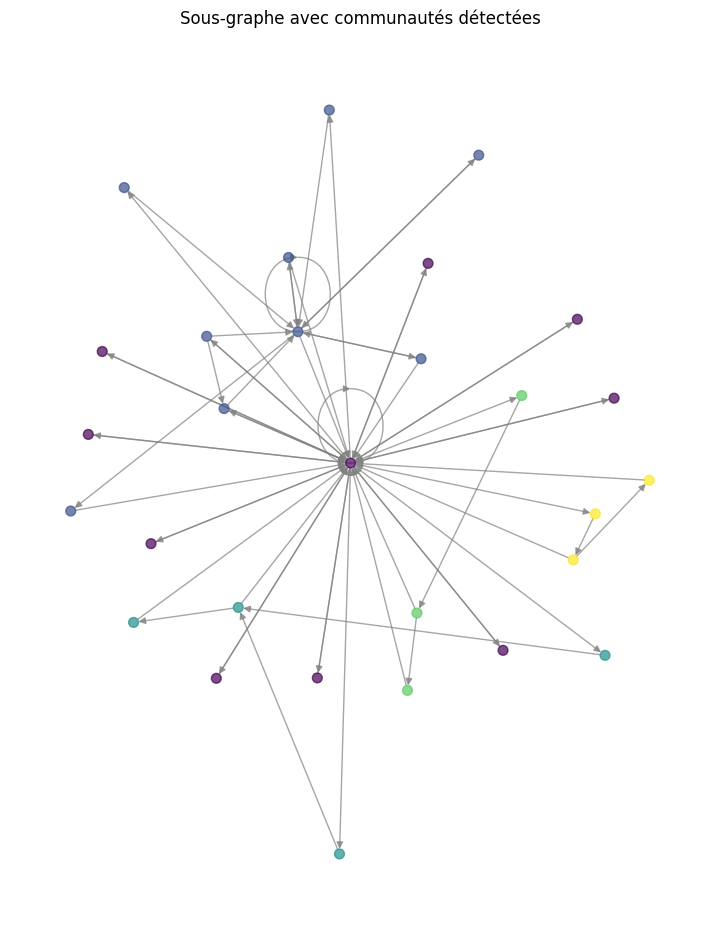

In [33]:
from networkx.algorithms.community import greedy_modularity_communities

# Identifier les communautés
communities = list(greedy_modularity_communities(connected_subgraph))
print(f"Nombre de communautés détectées : {len(communities)}")

# Visualiser un graphe avec les communautés
community_colors = {node: i for i, community in enumerate(communities) for node in community}
node_community_colors = [community_colors[node] for node in connected_subgraph.nodes]

plt.figure(figsize=(7, 9))
nx.draw(connected_subgraph,
        pos,
        with_labels=False,
        node_size=50,
        node_color=node_community_colors,
        edge_color='gray',
        alpha=0.7)
plt.title("Sous-graphe avec communautés détectées")
plt.show()


# Partie 1 Analyse du réseau social


In [34]:
# Étape 1 : Exploration initiale
# 1- Charger les données
print(f"Nombre de nœuds : {G.number_of_nodes()}")
print(f"Nombre de relations : {G.number_of_edges()}")


Nombre de nœuds : 219247
Nombre de relations : 304612


In [35]:
# Aperçu des relations
from collections import Counter

edge_types = [d['relation'] for _, _, d in G.edges(data=True)]
relation_counts = Counter(edge_types)
print("Distribution des types de relations :", relation_counts)


Distribution des types de relations : Counter({'HAS_CATEGORY': 96566, 'POSTED': 55986, 'HAS_HASHTAG': 55414, 'IS_ABOUT': 36668, 'TALKS_ABOUT': 31134, 'MENTIONS': 13854, 'RETWEETS': 6294, 'RETWEETED': 4377, 'REPLY_TO': 2479, 'REPLIED_TO': 1840})


In [36]:
# Étape 2 : Analyse des propriétés du réseau
# 1- Densité globale du réseau
density = nx.density(G)
print(f"Densité du réseau : {density}")

Densité du réseau : 6.33697027342011e-06


In [37]:
# 2- Centralité des nœuds
# Centralité de degré :
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top noeuds par centralité de degré :", top_degree)


Top noeuds par centralité de degré : [('18', 0.05139888527042683), ('565', 0.048370323745929235), ('570', 0.04723005208760935), ('577', 0.04520949070906653), ('568', 0.042833164573127906), ('562', 0.03449549820749295), ('557', 0.032324420970051906), ('17', 0.032278810103719115), ('579', 0.031188710398365307), ('563', 0.028260492779799862)]


In [38]:
# Centralité d’intermédiarité :
'''
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top noeuds par centralité d’intermédiarité :", top_betweenness)
'''
# Prends trop de temps lors de l'execution

# Créer un sous-graphe avec les noeuds les plus connectés
largest_cc = max(nx.strongly_connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Calculer la centralité sur le sous-graphe
betweenness_centrality = nx.betweenness_centrality(subgraph)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top noeuds par centralité d’intermédiarité :", top_betweenness)



Top noeuds par centralité d’intermédiarité : [('58597', 0.9365079365079365), ('90554', 0.23544973544973544), ('97924', 0.10449735449735449), ('90585', 0.0701058201058201), ('11740', 0.0701058201058201), ('42969', 0.0701058201058201), ('66181', 0.0701058201058201), ('41361', 0.03439153439153439), ('42515', 0.03439153439153439), ('42445', 0.03439153439153439)]


In [39]:
# 3 Détection des communautés

from networkx.algorithms.community import greedy_modularity_communities
'''
communities = list(greedy_modularity_communities(G))
print(f"Nombre de communautés détectées : {len(communities)}")
'''
# Prends trop de temps lors de l'execution

# Utiliser une composante fortement connectée
largest_cc = max(nx.strongly_connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Détection des communautés
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(subgraph))
print(f"Nombre de communautés détectées : {len(communities)}")


Nombre de communautés détectées : 5


In [41]:
# 1- Sous-graphe des relations spécifiques
retweet_edges = [(u, v) for u, v, d in G.edges(data=True) if d['relation'] == 'RETWEETED']
retweet_subgraph = G.edge_subgraph(retweet_edges)
print(f"Noeuds dans le sous-graphe des retweets : {retweet_subgraph.number_of_nodes()}")


Noeuds dans le sous-graphe des retweets : 8052


In [42]:
# 2- sous graphes des évènements
event_id = 'TRECIS-CTIT-H-001'
event_edges = [(u, v) for u, v, d in G.edges(data=True) if d['relation'] == 'IS_ABOUT' and v == event_id]
event_subgraph = G.edge_subgraph(event_edges)
print(f"Noeuds dans le sous-graphe de l’événement {event_id} : {event_subgraph.number_of_nodes()}")


Noeuds dans le sous-graphe de l’événement TRECIS-CTIT-H-001 : 0


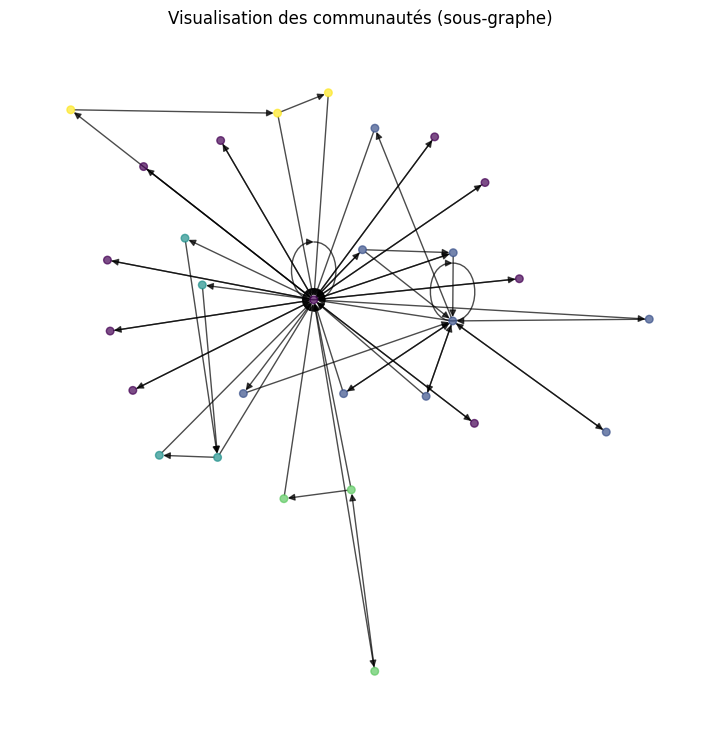

In [43]:
# Étape 4 : Visualisations
# Utiliser la composante fortement connectée la plus grande
largest_cc = max(nx.strongly_connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Visualiser uniquement cette composante
node_colors = {node: i for i, community in enumerate(communities) for node in community if node in subgraph}
plt.figure(figsize=(7, 7))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw(subgraph,
        pos,
        with_labels=False,
        node_size=30,
        node_color=[node_colors.get(node, 0) for node in subgraph.nodes],
        alpha=0.7)
plt.title("Visualisation des communautés (sous-graphe)")
plt.show()


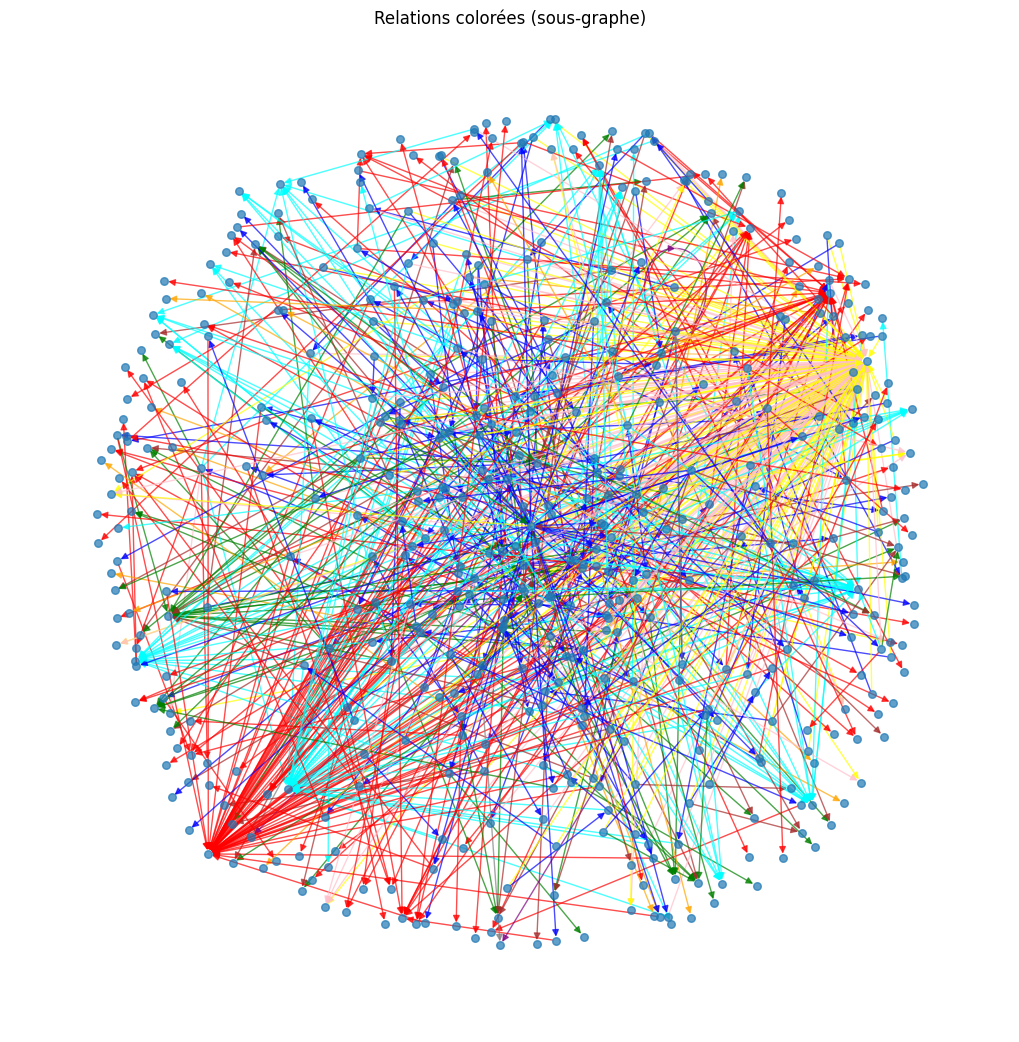

In [45]:
# 2- Relations colorées

# Échantillonner 1000 arêtes
sample_edges = list(G.edges(data=True))[:1000]
sample_edges_tuples = [(u, v) for u, v, _ in sample_edges]
sample_graph = G.edge_subgraph(sample_edges_tuples)

# Définir un mappage de couleurs pour chaque type de relation
relation_color_map = {
    'POSTED': 'blue',
    'MENTIONS': 'green',
    'RETWEETED': 'orange',
    'HAS_HASHTAG': 'red',
    'REPLIED_TO': 'purple',
    'RETWEETS': 'brown',
    'IS_ABOUT': 'pink',
    'HAS_CATEGORY': 'cyan',
    'TALKS_ABOUT': 'yellow',
}

# Assigner les couleurs aux arêtes du sous-graphe
edge_colors = [relation_color_map.get(d['relation'], 'gray') for _, _, d in sample_graph.edges(data=True)]

# Visualiser le sous-graphe
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(sample_graph, k=0.5)
nx.draw(sample_graph, pos,
        with_labels=False,
        edge_color=edge_colors,
        node_size=30,
        alpha=0.7)
plt.title("Relations colorées (sous-graphe)")
plt.show()


In [46]:
# Lister les types de relations disponibles
relation_types = [d['relation'] for _, _, d in G.edges(data=True) if 'relation' in d]
from collections import Counter
relation_counts = Counter(relation_types)

print("Types de relations disponibles et leurs fréquences :")
print(relation_counts)


Types de relations disponibles et leurs fréquences :
Counter({'HAS_CATEGORY': 96566, 'POSTED': 55986, 'HAS_HASHTAG': 55414, 'IS_ABOUT': 36668, 'TALKS_ABOUT': 31134, 'MENTIONS': 13854, 'RETWEETS': 6294, 'RETWEETED': 4377, 'REPLY_TO': 2479, 'REPLIED_TO': 1840})


In [57]:
# Recharger toutes les relations et recréer le graphe
G = nx.DiGraph()

# Ajouter les nœuds
for _, row in nodes_data['User.json'].iterrows():
    G.add_node(row['n.properties.id'], type='User', followers=row['n.properties.followers_count'])

for _, row in nodes_data['Tweet.json'].iterrows():
    G.add_node(row['n.properties.id'], type='Tweet', retweets=row['n.properties.retweet_count'])

# Ajouter les relations IS_ABOUT
for _, row in relations_data['IS_ABOUT.json'].iterrows():
    G.add_edge(row['r.start.id'], row['r.end.id'], relation='IS_ABOUT')

# Vérification des relations
relation_types = [d['relation'] for _, _, d in G.edges(data=True) if 'relation' in d]
from collections import Counter
relation_counts = Counter(relation_types)
print("Types de relations disponibles et leurs fréquences :")
print(relation_counts)


Types de relations disponibles et leurs fréquences :
Counter({'IS_ABOUT': 36668})


In [59]:
# Vérifier les relations IS_ABOUT
event_edges = [(u, v, d) for u, v, d in G.edges(data=True) if d.get('relation') == 'IS_ABOUT']
print(f"Nombre de relations IS_ABOUT : {len(event_edges)}")

# Afficher un exemple de relation
if event_edges:
    print("Exemple de relation IS_ABOUT :", event_edges[:5])
else:
    print("Aucune relation IS_ABOUT trouvée.")


Nombre de relations IS_ABOUT : 36668
Exemple de relation IS_ABOUT : [('588', '0', {'relation': 'IS_ABOUT'}), ('589', '0', {'relation': 'IS_ABOUT'}), ('3060', '4', {'relation': 'IS_ABOUT'}), ('582', '0', {'relation': 'IS_ABOUT'}), ('583', '0', {'relation': 'IS_ABOUT'})]


Top 10 événements avec le plus de tweets associés :
Event
18    5858
17    3938
27    2498
26    2498
28    2340
29    2073
20    2064
25    1998
30    1997
32    1348
Name: count, dtype: int64


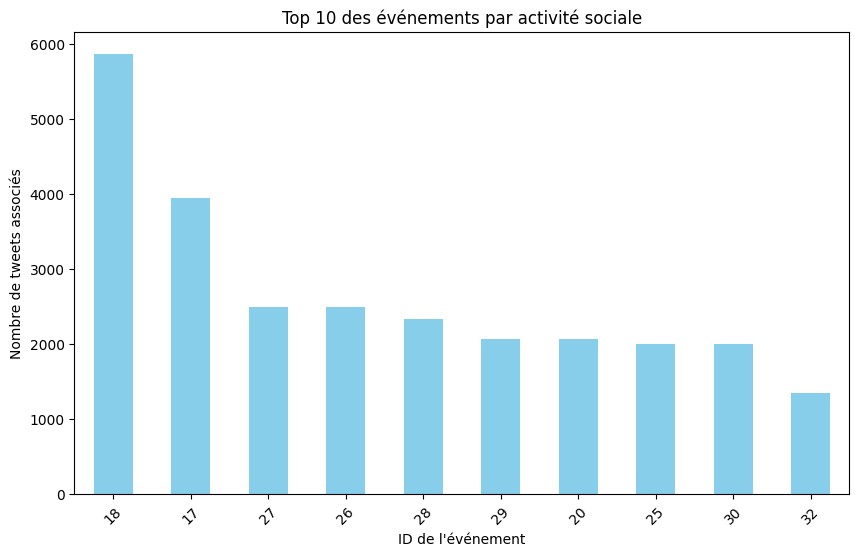

In [60]:
# Créer une DataFrame pour les relations IS_ABOUT
event_edges_df = pd.DataFrame(event_edges, columns=['Tweet', 'Event', 'Relation'])

# Compter le nombre de tweets par événement
event_counts = event_edges_df['Event'].value_counts()
print("Top 10 événements avec le plus de tweets associés :")
print(event_counts.head(10))

# Visualisation des événements
top_events = event_counts.head(10)
if not top_events.empty:
    top_events.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title("Top 10 des événements par activité sociale")
    plt.xlabel("ID de l'événement")
    plt.ylabel("Nombre de tweets associés")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Aucun événement à visualiser.")


In [63]:
# Analyse approfondie d’un événement spécifique
# Filtrer les tweets associés à un événement spécifique
event_id = '0'
tweets_for_event = event_edges_df[event_edges_df['Event'] == event_id]['Tweet']

print(f"Nombre de tweets associés à l'événement {event_id} : {len(tweets_for_event)}")
print("Exemples de tweets associés :")
print(tweets_for_event.head(10))


Nombre de tweets associés à l'événement 0 : 263
Exemples de tweets associés :
0     588
1     589
3     582
4     583
5     584
6     585
7     586
8     587
9     590
10    591
Name: Tweet, dtype: object


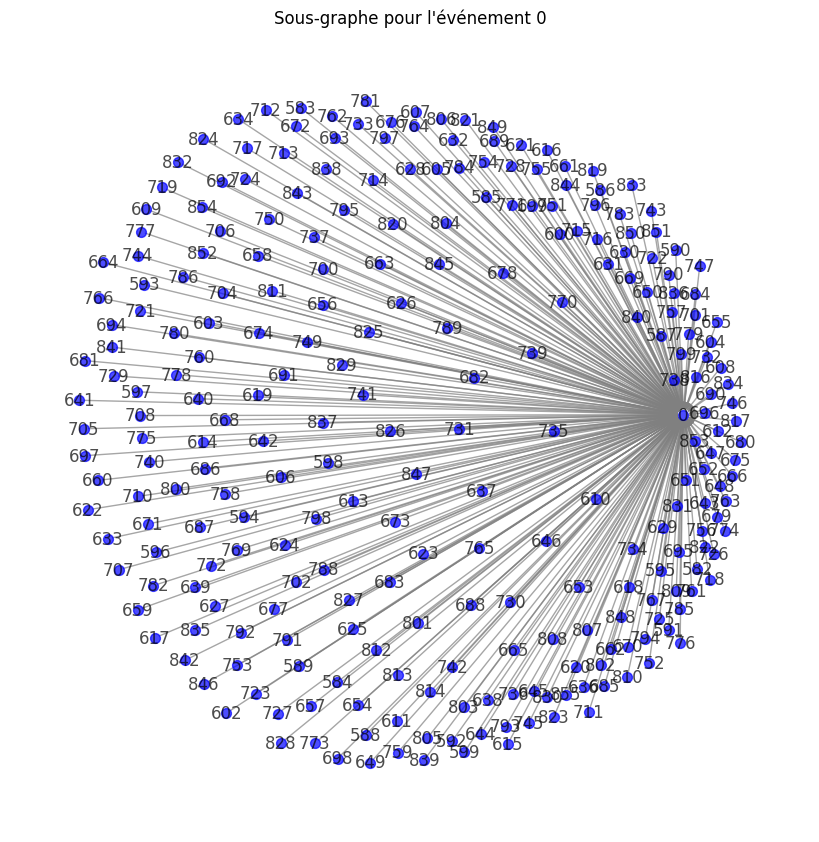

In [64]:
# Créer un sous-graphe pour un événement spécifique
subgraph_nodes = list(tweets_for_event)
subgraph_nodes.append(event_id)
subgraph = G.subgraph(subgraph_nodes)

# Visualiser le sous-graphe
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw(subgraph, pos, with_labels=True, node_size=50, node_color='blue', edge_color='gray', alpha=0.7)
plt.title(f"Sous-graphe pour l'événement {event_id}")
plt.show()


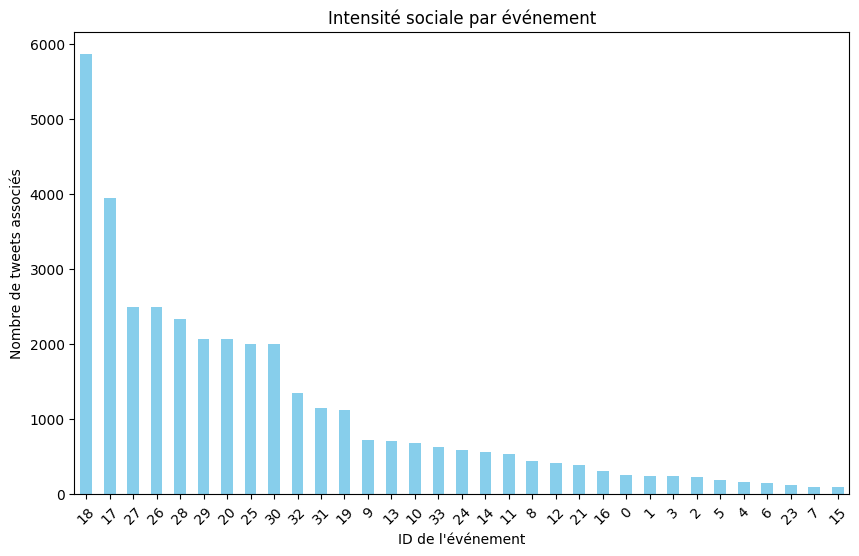

In [71]:
# Étape 2 : Créer un dashboard
# 1. Mesurer l'intensité de l'activité sociale
# Regroupez les tweets par événement pour analyser leur activité.


# Vue globale : Intensité par événement
event_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', title="Intensité sociale par événement")
plt.xlabel("ID de l'événement")
plt.ylabel("Nombre de tweets associés")
plt.xticks(rotation=45)
plt.show()



In [72]:
# 2- Identifier les utilisateurs centraux
# Utilisez plusieurs mesures de centralité pour identifier les utilisateurs influents.

# Centralité de degré
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top utilisateurs par centralité de degré :", top_degree)

# Affichage dans un tableau
import pandas as pd
df_central_users = pd.DataFrame(top_degree, columns=["Utilisateur", "Centralité"])
print(df_central_users)


Top utilisateurs par centralité de degré : [('18', 0.0431293438567558), ('17', 0.02899340322770644), ('26', 0.018391447755919426), ('27', 0.018391447755919426), ('28', 0.017228177641653904), ('29', 0.015262398397926728), ('20', 0.015196136176228059), ('25', 0.014710213217104489), ('30', 0.014702850748026857), ('32', 0.00992460831664507)]
  Utilisateur  Centralité
0          18    0.043129
1          17    0.028993
2          26    0.018391
3          27    0.018391
4          28    0.017228
5          29    0.015262
6          20    0.015196
7          25    0.014710
8          30    0.014703
9          32    0.009925


In [74]:
# 3- Regrouper les résultats dans un tableau
# Créez un tableau pour inclure plusieurs mesures de centralité.

# Calcul de plusieurs centralités
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(subgraph)

# Combiner les résultats
centrality_df = pd.DataFrame({
    "Utilisateur": list(degree_centrality.keys()),
    "Degré": list(degree_centrality.values()),
    "Intermédiarité": [betweenness_centrality.get(node, 0) for node in degree_centrality.keys()]
})

# Trier par centralité de degré
centrality_df = centrality_df.sort_values(by="Degré", ascending=False).head(10)
print(centrality_df)


       Utilisateur     Degré  Intermédiarité
109142          18  0.043129             0.0
105203          17  0.028993             0.0
121285          26  0.018391             0.0
123784          27  0.018391             0.0
126283          28  0.017228             0.0
128624          29  0.015262             0.0
116119          20  0.015196             0.0
119286          25  0.014710             0.0
130700          30  0.014703             0.0
129511          32  0.009925             0.0


In [65]:

!pip install node2vec

In [127]:
# Extraire les nœuds et relations associés à l'événement
relations_of_interest = ['IS_ABOUT', 'POSTED', 'HAS_HASHTAG']
event_id = '0'

# Filtrer les arêtes correspondant à l'événement et aux relations d'intérêt
subgraph_edges = [
    (u, v) for u, v, d in G.edges(data=True)
    if d['relation'] in relations_of_interest and d.get('relation') == 'IS_ABOUT' and v == event_id
]

# Créer le sous-graphe basé sur les arêtes
subgraph = G.edge_subgraph(subgraph_edges)

print(f"Nombre de noeuds dans le sous-graphe : {subgraph.number_of_nodes()}")
print(f"Nombre de relations dans le sous-graphe : {subgraph.number_of_edges()}")


Nombre de noeuds dans le sous-graphe : 264
Nombre de relations dans le sous-graphe : 263


In [100]:
# Inclure toutes les relations associées aux nœuds extraits
event_nodes = [u for u, v, d in G.edges(data=True) if d['relation'] == 'IS_ABOUT' and v == event_id]

# Inclure toutes les relations connectées aux nœuds extraits
subgraph_nodes = set(event_nodes)
subgraph_edges = [
    (u, v) for u, v, d in G.edges(data=True)
    if u in subgraph_nodes or v in subgraph_nodes
]

# Créer le sous-graphe élargi
subgraph = G.edge_subgraph(subgraph_edges)

print(f"Nombre de nœuds dans le sous-graphe élargi : {subgraph.number_of_nodes()}")
print(f"Nombre de relations dans le sous-graphe élargi : {subgraph.number_of_edges()}")


Nombre de nœuds dans le sous-graphe élargi : 264
Nombre de relations dans le sous-graphe élargi : 263


In [101]:
from node2vec import Node2Vec

if subgraph.number_of_edges() > 0:
    # Générer les embeddings
    node2vec = Node2Vec(subgraph, dimensions=32, walk_length=20, num_walks=50, workers=2)
    model = node2vec.fit(window=5, min_count=1, batch_words=4)

    # Extraire les embeddings
    embeddings = {node: model.wv[node] for node in subgraph.nodes() if node in model.wv}
    print(f"Embeddings générés pour {len(embeddings)} nœuds.")
else:
    print("Le sous-graphe est vide ou n'a pas suffisamment de relations pour Node2Vec.")


Computing transition probabilities:   0%|          | 0/264 [00:00<?, ?it/s]

Embeddings générés pour 264 nœuds.


In [102]:
from sklearn.cluster import KMeans
import numpy as np

# Convertir les embeddings en tableau numpy
embedding_vectors = np.array(list(embeddings.values()))

# Vérifier les dimensions des embeddings
print(f"Forme des embeddings : {embedding_vectors.shape}")

# Appliquer K-Means
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embedding_vectors)

# Associer les clusters aux noeuds
node_cluster_map = {node: cluster for node, cluster in zip(embeddings.keys(), clusters)}

# Résumé des clusters
from collections import Counter
cluster_counts = Counter(clusters)
print("Répartition des noeuds par cluster :", cluster_counts)


Forme des embeddings : (264, 32)
Répartition des noeuds par cluster : Counter({2: 93, 4: 62, 3: 61, 0: 47, 1: 1})


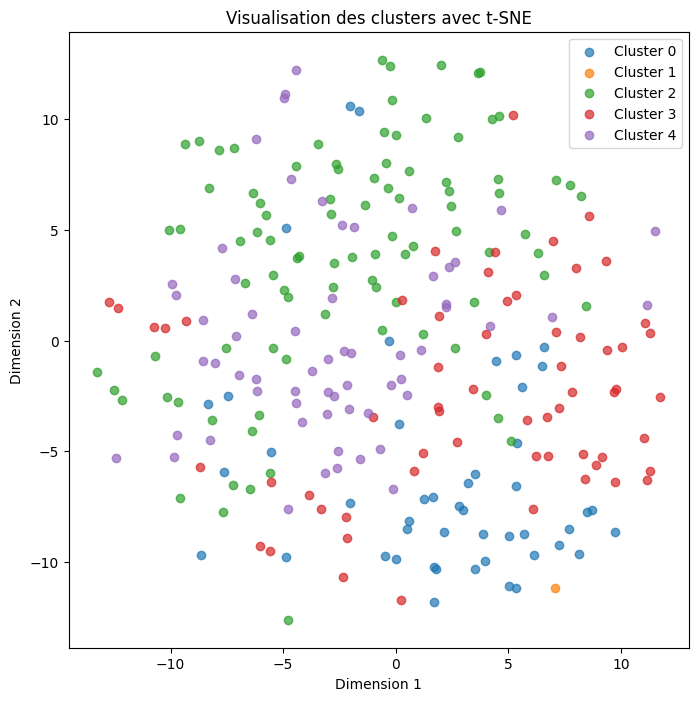

In [104]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embedding_vectors)

# Visualisation des clusters
plt.figure(figsize=(8, 8))
for cluster in range(n_clusters):
    cluster_points = reduced_embeddings[np.array(clusters) == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", alpha=0.7)

plt.title("Visualisation des clusters avec t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


In [107]:
# Lister les IDs de nœuds avec des embeddings
print("Exemples de noeuds disponibles dans les embeddings :")
print(list(embeddings.keys())[:10])  # Affiche les 10 premiers noeuds avec embeddings


Exemples de nœuds disponibles dans les embeddings :
['750', '636', '778', '637', '797', '809', '853', '776', '625', '681']


In [108]:
# Recommandation de tweets à partir des embedding
from sklearn.metrics.pairwise import cosine_similarity

# Exemple : Recommander des tweets pour un noeud utilisateur
user_id = '750'
if user_id in embeddings:
    user_embedding = embeddings[user_id].reshape(1, -1)
    tweet_embeddings = {node: emb for node, emb in embeddings.items() if node != user_id}

    # Calculer la similarité cosine entre l'utilisateur et tous les tweets
    tweet_ids = list(tweet_embeddings.keys())
    tweet_vectors = np.array(list(tweet_embeddings.values()))
    similarities = cosine_similarity(user_embedding, tweet_vectors)[0]

    # Trier les tweets les plus similaires
    recommended_tweets = sorted(zip(tweet_ids, similarities), key=lambda x: x[1], reverse=True)[:5]
    print("Tweets recommandés :", recommended_tweets)
else:
    print(f"L'utilisateur {user_id} n'a pas d'embedding.")



Tweets recommandés : [('799', 0.81054497), ('795', 0.80877185), ('672', 0.7616041), ('823', 0.7552591), ('680', 0.74795365)]


In [116]:
# Résumé des clusters
print("Résumé des clusters :")
from collections import Counter
cluster_counts = Counter(node_cluster_map.values())
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} noeud")

# Recommandations pour un nœud spécifique
selected_node = '636'
if selected_node in embeddings:
    user_embedding = embeddings[selected_node].reshape(1, -1)
    tweet_embeddings = {node: emb for node, emb in embeddings.items() if node != selected_node}
    tweet_ids = list(tweet_embeddings.keys())
    tweet_vectors = np.array(list(tweet_embeddings.values()))
    similarities = cosine_similarity(user_embedding, tweet_vectors)[0]
    recommended_tweets = sorted(zip(tweet_ids, similarities), key=lambda x: x[1], reverse=True)[:5]

    print(f"Recommandations pour le noeud {selected_node}:")
    for tweet, score in recommended_tweets:
        print(f"Tweet ID : {tweet}, Similarité : {score:.4f}")
else:
    print(f"Le noeud {selected_node} n'a pas d'embedding.")


Résumé des clusters :
Cluster 2: 93 noeud
Cluster 3: 61 noeud
Cluster 4: 62 noeud
Cluster 0: 47 noeud
Cluster 1: 1 noeud
Recommandations pour le noeud 636:
Tweet ID : 752, Similarité : 0.7879
Tweet ID : 724, Similarité : 0.7831
Tweet ID : 764, Similarité : 0.7647
Tweet ID : 811, Similarité : 0.7586
Tweet ID : 763, Similarité : 0.7578


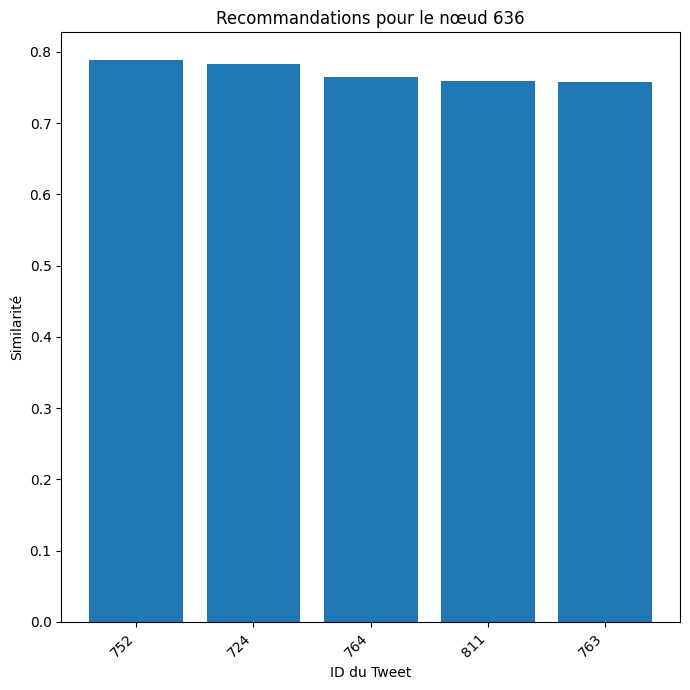

In [131]:
# Visualisation des recommandations
if selected_node in embeddings:
    plt.figure(figsize=(7, 7))
    plt.bar([tweet for tweet, score in recommended_tweets], [score for tweet, score in recommended_tweets])
    plt.title(f"Recommandations pour le nœud {selected_node}")
    plt.xlabel("ID du Tweet")
    plt.ylabel("Similarité")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()